In [1]:
import pandas as pd
import numpy as np
!pip install pyshp
import shapefile
import matplotlib.pyplot as plt



In [2]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id = '1LrMt7BgDG5johxmlwohd74dz-fb-oYJz'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('NRI_Shapefile_Counties.shp')
shape = shapefile.Reader('NRI_Shapefile_Counties.shp')

print(len(shape))
#print(shape.record(0)['STCOFIPS'])

3142


In [4]:
link = 'https://drive.google.com/file/d/11R_pB7nWQgVwouQymqW4YA6QwHqTkyNC/view?usp=sharing'
fluff, id = link.split('=')
#print (fluff) # Verify that you have everything after '='
id = '11R_pB7nWQgVwouQymqW4YA6QwHqTkyNC'
#print(id)

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Climate-Impact-Lab-US-Data.xlsx')  
impactDF = pd.read_excel('Climate-Impact-Lab-US-Data.xlsx')# Dataset is now stored in a Pandas Dataframe

#print(impactDF)

In [5]:
impactDF.head()

,State,1981-2010_Avg_Summer,2020-2039_50th_Summer,2040-2059_50th_Summer,2080-2099_50th_Summer,1981-2010_Avg_Winter,2020-2039_50th_Winter,2040-2059_50th_Winter,2080-2099_50th_Winter,2020-2039_Mort_Cost,2040-2059_Mort_Cost,2080-2099_Mort_Cost
0,AL,79.00,81.13,82.21,83.02,46.04,47.49,48.52,49.67,0.534587,1.130850,2.378555
1,AK,55.64,57.58,58.79,59.73,4.18,7.09,10.06,11.52,-4.888009,-10.942609,-20.682415
2,AZ,78.99,81.18,82.26,83.58,43.79,45.78,46.57,47.42,0.832190,1.742076,3.098097
3,AR,79.00,81.52,82.48,83.74,41.20,43.39,44.30,45.37,0.768862,1.696463,3.142039
4,CA,74.67,76.54,78.03,79.02,45.79,47.54,48.33,49.04,0.674816,1.659754,3.324280


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# id2 = '1lzjPSaU7iQ6AHIMoUIUZlmNHWkkmDaKf'

# downloaded2 = drive.CreateFile({'id':id2}) 
# downloaded2.GetContentFile('County_Damages.csv')  
# countyDamage = pd.read_csv('County_Damages.csv')# Dataset is now stored in a Pandas Dataframe

# countyDamage.head()

In [8]:
# id3 = '1hrwIBl8sBOAT239cZyTXTnekbxHkeC7k'

# downloaded3 = drive.CreateFile({'id':id3}) 
# downloaded3.GetContentFile('NRI_Counties.csv')  
# NRIcounty = pd.read_csv('NRI_Counties.csv')# Dataset is now stored in a Pandas Dataframe

# NRIcounty.head()

In [9]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('County_Damages').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
#print(countyDamage.head())
#print(rows)

# Convert to a DataFrame and render.
countyDamage = pd.DataFrame.from_records(rows)

new_header = countyDamage.iloc[0] #grab the first row for the header
countyDamage = countyDamage[1:] #take the data less the header row
countyDamage.columns = new_header #set the header row as the df header

countyDamage.head()

,State Code,County Name,County FIPS code,County Population (in 2012),County Income (in 2012),Agricultural Damage (%) (4 major crops),Mortality (deaths per 100k),Energy Expenditures (%),Labor Low-risk (%),Labor High-risk (%),Coastal damage (log10(% county income)),Property Crime (%),Violent Crime (%),Total damages (% county income)
1,AL,Autauga County,1001,55192,35106,-16.00353622,27.02458382,11.99868584,-0.515578687,-2.120601177,-2.051728964,0.052951075,2.369668484,9.43900013
2,AL,Baldwin County,1003,190560,38228,-12.97430611,31.89538574,12.06669998,-0.378805727,-1.937922955,-0.698060453,0.14725703,2.495163679,9.407799721
3,AL,Barbour County,1005,27169,28431,-6.562764645,25.53455162,11.38057899,-0.394442827,-1.976558805,-1.961137652,0.151925504,2.528312922,10.87199974
4,AL,Bibb County,1007,22634,27109,,22.53026772,12.07042408,-0.428851068,-1.934934497,-1.940462589,0.187312141,2.525677443,10.77700043
5,AL,Blount County,1009,57748,29513,-18.4881897,20.00385094,11.90812778,-0.374522358,-1.854807973,-1.976277828,0.283651412,2.659189463,8.984900475


In [10]:
worksheet = gc.open('NRI_Counties').sheet1

# get_all_values gives a list of rows.
rows2 = worksheet.get_all_values()
#print(rows)

# Convert to a DataFrame and render.
NRIcounty = pd.DataFrame.from_records(rows2)

new_header2 = NRIcounty.iloc[0] #grab the first row for the header
NRIcounty = NRIcounty[1:] #take the data less the header row
NRIcounty.columns = new_header2 #set the header row as the df header

NRIcounty.head()

,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYFIPS,STCOFIPS,POPULATION,BUILDVALUE,AGRIVALUE,AREA,RISK_SCORE,RISK_RATNG
1,Kentucky,KY,21,Johnson,115,21115,23356,1924008000,706000,261.9581436,11.22594469,Relatively Low
2,Kentucky,KY,21,Kenton,117,21117,159720,18773375000,5390000,160.2139747,16.0404291,Relatively Moderate
3,Kentucky,KY,21,Knott,119,21119,16346,1170376000,408000,351.5179778,15.81024619,Relatively Moderate
4,Kentucky,KY,21,Knox,121,21121,31883,2135773000,2534000,386.2984352,13.28070134,Relatively Low
5,Kentucky,KY,21,Larue,123,21123,14193,1221343000,41112000,261.5395635,5.970874905,Very Low


In [11]:
#countyCombo = NRIcounty.join(countyDamage.set_index(['COUNTYFIPS','County FIPS code']), how='left', on=['COUNTYFIPS','County FIPS code'], lsuffix='_x', rsuffix='_y')
#countyCombo = NRIcounty.merge(countyDamage, on=['COUNTYFIPS','County FIPS code'], how = 'inner')

In [12]:
import re
fips_prefixes = {'AL':'1',
'AK':'2',
'AZ':'4',
'AR':'5',
'CA':'6',
'CO':'8',
'CT':'9',
'DC':'11',
'DE':'10',
'FL':'12',
'GA':'13',
'HI':'15',
'ID':'16',
'IL':'17',
'IN':'18',
'IA':'19',
'KS':'20',
'KY':'21',
'LA':'22',
'ME':'23',
'MD':'24',
'MA':'25',
'MI':'26',
'MN':'27',
'MS':'28',
'MO':'29',
'MT':'30',
'NE':'31',
'NV':'32',
'NH':'33',
'NJ':'34',
'NM':'35',
'NY':'36',
'NC':'37',
'ND':'38',
'OH':'39',
'OK':'40',
'OR':'41',
'PA':'42',
'RI':'44',
'SC':'45',
'SD':'46',
'TN':'47',
'TX':'48',
'UT':'49',
'VT':'50',
'VA':'51',
'WA':'53',
'WV':'54',
'WI':'55',
'WY':'56',
'AS':'60',
'GU':'66',
'MP':'69',
'PR':'72',
'VI':'78'}
def replace_fips(row):
    old_code = str(row['County FIPS code'])
    new_code = re.sub(r'^{}'.format(fips_prefixes[row['State Code']]), '', old_code)
    return int(new_code)
#countyDamage['County FIPS code'] = countyDamage.apply(lambda row: replace_fips(row),axis=1)

In [13]:
countyDamage = countyDamage.rename(columns={'County FIPS code': 'COUNTYFIPS'})
countyDamage.head()

,State Code,County Name,COUNTYFIPS,County Population (in 2012),County Income (in 2012),Agricultural Damage (%) (4 major crops),Mortality (deaths per 100k),Energy Expenditures (%),Labor Low-risk (%),Labor High-risk (%),Coastal damage (log10(% county income)),Property Crime (%),Violent Crime (%),Total damages (% county income)
1,AL,Autauga County,1001,55192,35106,-16.00353622,27.02458382,11.99868584,-0.515578687,-2.120601177,-2.051728964,0.052951075,2.369668484,9.43900013
2,AL,Baldwin County,1003,190560,38228,-12.97430611,31.89538574,12.06669998,-0.378805727,-1.937922955,-0.698060453,0.14725703,2.495163679,9.407799721
3,AL,Barbour County,1005,27169,28431,-6.562764645,25.53455162,11.38057899,-0.394442827,-1.976558805,-1.961137652,0.151925504,2.528312922,10.87199974
4,AL,Bibb County,1007,22634,27109,,22.53026772,12.07042408,-0.428851068,-1.934934497,-1.940462589,0.187312141,2.525677443,10.77700043
5,AL,Blount County,1009,57748,29513,-18.4881897,20.00385094,11.90812778,-0.374522358,-1.854807973,-1.976277828,0.283651412,2.659189463,8.984900475


In [14]:
countyCombo = NRIcounty.set_index('STCOFIPS').join(countyDamage.set_index('COUNTYFIPS'))

countyCombo.head()

,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYFIPS,POPULATION,BUILDVALUE,AGRIVALUE,AREA,RISK_SCORE,RISK_RATNG,State Code,County Name,County Population (in 2012),County Income (in 2012),Agricultural Damage (%) (4 major crops),Mortality (deaths per 100k),Energy Expenditures (%),Labor Low-risk (%),Labor High-risk (%),Coastal damage (log10(% county income)),Property Crime (%),Violent Crime (%),Total damages (% county income)
STCOFIPS,,,,,,,,,,,,,,,,,,,,,,,,
21115,Kentucky,KY,21,Johnson,115,23356,1924008000,706000,261.9581436,11.22594469,Relatively Low,KY,Johnson County,23415,30209,,12.0535984,12.11389637,-0.130966216,-1.339758754,,0.756579459,3.392812252,6.581299782
21117,Kentucky,KY,21,Kenton,117,159720,18773375000,5390000,160.2139747,16.0404291,Relatively Moderate,KY,Kenton County,161670,43198,-57.3559761,7.926316738,12.18513107,-0.186978042,-1.507999063,,0.895220459,3.462113142,3.3677001
21119,Kentucky,KY,21,Knott,119,16346,1170376000,408000,351.5179778,15.81024619,Relatively Moderate,KY,Knott County,16087,26997,,10.77737331,12.11389637,-0.130966216,-1.339758754,,0.760602176,3.400568962,6.81099987
21121,Kentucky,KY,21,Knox,121,31883,2135773000,2534000,386.2984352,13.28070134,Relatively Low,KY,Knox County,31700,26307,-55.88256836,6.630846024,11.34134769,-0.192688122,-1.581007481,,0.596740067,3.174332857,5.341100216
21123,Kentucky,KY,21,Larue,123,14193,1221343000,41112000,261.5395635,5.970874905,Very Low,KY,Larue County,14085,30798,-34.13772583,13.87311363,12.47259045,-0.193003789,-1.653862119,,0.619858086,3.257323503,6.454500198


In [15]:
countyCombo = countyCombo.rename(columns={'POPULATION': 'POPULATION2020', 'County Population (in 2012)': 'POPULATION2012', 'Coastal damage (log10(% county income))': 'COASTALDAMAGE', 'Total damages (% county income)': 'TOTALDAMAGE_%'})

In [16]:
countyCombo.head()

,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYFIPS,POPULATION2020,BUILDVALUE,AGRIVALUE,AREA,RISK_SCORE,RISK_RATNG,State Code,County Name,POPULATION2012,County Income (in 2012),Agricultural Damage (%) (4 major crops),Mortality (deaths per 100k),Energy Expenditures (%),Labor Low-risk (%),Labor High-risk (%),COASTALDAMAGE,Property Crime (%),Violent Crime (%),TOTALDAMAGE_%
STCOFIPS,,,,,,,,,,,,,,,,,,,,,,,,
21115,Kentucky,KY,21,Johnson,115,23356,1924008000,706000,261.9581436,11.22594469,Relatively Low,KY,Johnson County,23415,30209,,12.0535984,12.11389637,-0.130966216,-1.339758754,,0.756579459,3.392812252,6.581299782
21117,Kentucky,KY,21,Kenton,117,159720,18773375000,5390000,160.2139747,16.0404291,Relatively Moderate,KY,Kenton County,161670,43198,-57.3559761,7.926316738,12.18513107,-0.186978042,-1.507999063,,0.895220459,3.462113142,3.3677001
21119,Kentucky,KY,21,Knott,119,16346,1170376000,408000,351.5179778,15.81024619,Relatively Moderate,KY,Knott County,16087,26997,,10.77737331,12.11389637,-0.130966216,-1.339758754,,0.760602176,3.400568962,6.81099987
21121,Kentucky,KY,21,Knox,121,31883,2135773000,2534000,386.2984352,13.28070134,Relatively Low,KY,Knox County,31700,26307,-55.88256836,6.630846024,11.34134769,-0.192688122,-1.581007481,,0.596740067,3.174332857,5.341100216
21123,Kentucky,KY,21,Larue,123,14193,1221343000,41112000,261.5395635,5.970874905,Very Low,KY,Larue County,14085,30798,-34.13772583,13.87311363,12.47259045,-0.193003789,-1.653862119,,0.619858086,3.257323503,6.454500198


In [17]:
#countyCombo.drop('State Code')
del countyCombo['State Code']
del countyCombo['COUNTY']

countyCombo.rename(columns={'County Name': 'COUNTY_NAME'})
countyCombo.head()

,STATE,STATEABBRV,STATEFIPS,COUNTYFIPS,POPULATION2020,BUILDVALUE,AGRIVALUE,AREA,RISK_SCORE,RISK_RATNG,County Name,POPULATION2012,County Income (in 2012),Agricultural Damage (%) (4 major crops),Mortality (deaths per 100k),Energy Expenditures (%),Labor Low-risk (%),Labor High-risk (%),COASTALDAMAGE,Property Crime (%),Violent Crime (%),TOTALDAMAGE_%
STCOFIPS,,,,,,,,,,,,,,,,,,,,,,
21115,Kentucky,KY,21,115,23356,1924008000,706000,261.9581436,11.22594469,Relatively Low,Johnson County,23415,30209,,12.0535984,12.11389637,-0.130966216,-1.339758754,,0.756579459,3.392812252,6.581299782
21117,Kentucky,KY,21,117,159720,18773375000,5390000,160.2139747,16.0404291,Relatively Moderate,Kenton County,161670,43198,-57.3559761,7.926316738,12.18513107,-0.186978042,-1.507999063,,0.895220459,3.462113142,3.3677001
21119,Kentucky,KY,21,119,16346,1170376000,408000,351.5179778,15.81024619,Relatively Moderate,Knott County,16087,26997,,10.77737331,12.11389637,-0.130966216,-1.339758754,,0.760602176,3.400568962,6.81099987
21121,Kentucky,KY,21,121,31883,2135773000,2534000,386.2984352,13.28070134,Relatively Low,Knox County,31700,26307,-55.88256836,6.630846024,11.34134769,-0.192688122,-1.581007481,,0.596740067,3.174332857,5.341100216
21123,Kentucky,KY,21,123,14193,1221343000,41112000,261.5395635,5.970874905,Very Low,Larue County,14085,30798,-34.13772583,13.87311363,12.47259045,-0.193003789,-1.653862119,,0.619858086,3.257323503,6.454500198


In [18]:
print(type(countyCombo['Energy Expenditures (%)'][2]))
print(countyCombo['Energy Expenditures (%)'][2])
countyCombo['Energy Expenditures (%)'] = countyCombo['Energy Expenditures (%)'].astype(float)
countyCombo['County Income (in 2012)'] = countyCombo['County Income (in 2012)'].astype(float)
print(type(countyCombo['Energy Expenditures (%)'][2]))

<class 'str'>
12.11389637
<class 'numpy.float64'>


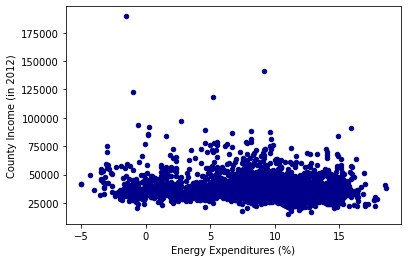

In [19]:
energyCoast = countyCombo.plot.scatter(x='Energy Expenditures (%)', y='County Income (in 2012)', c='DarkBlue')

In [20]:
print(type(countyCombo['Energy Expenditures (%)'][2]))
print(countyCombo['Energy Expenditures (%)'][2])
countyCombo['Energy Expenditures (%)'] = countyCombo['Energy Expenditures (%)']
countyCombo['Violent Crime (%)'] = countyCombo['Violent Crime (%)'].astype(float)
print(type(countyCombo['Energy Expenditures (%)'][2]))

<class 'numpy.float64'>
12.11389637
<class 'numpy.float64'>


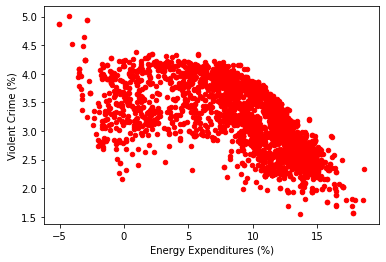

In [21]:
energyCrime = countyCombo.plot.scatter(x='Energy Expenditures (%)', y='Violent Crime (%)', c='Red')

In [22]:
#replace empty items with NaN
countyCombo = countyCombo.replace(r'^\s*$', np.nan, regex=True)
countyCombo.head()

,STATE,STATEABBRV,STATEFIPS,COUNTYFIPS,POPULATION2020,BUILDVALUE,AGRIVALUE,AREA,RISK_SCORE,RISK_RATNG,County Name,POPULATION2012,County Income (in 2012),Agricultural Damage (%) (4 major crops),Mortality (deaths per 100k),Energy Expenditures (%),Labor Low-risk (%),Labor High-risk (%),COASTALDAMAGE,Property Crime (%),Violent Crime (%),TOTALDAMAGE_%
STCOFIPS,,,,,,,,,,,,,,,,,,,,,,
21115,Kentucky,KY,21,115,23356,1924008000,706000,261.9581436,11.22594469,Relatively Low,Johnson County,23415,30209.0,NaN,12.0535984,12.113896,-0.130966216,-1.339758754,NaN,0.756579459,3.392812,6.581299782
21117,Kentucky,KY,21,117,159720,18773375000,5390000,160.2139747,16.0404291,Relatively Moderate,Kenton County,161670,43198.0,-57.3559761,7.926316738,12.185131,-0.186978042,-1.507999063,NaN,0.895220459,3.462113,3.3677001
21119,Kentucky,KY,21,119,16346,1170376000,408000,351.5179778,15.81024619,Relatively Moderate,Knott County,16087,26997.0,NaN,10.77737331,12.113896,-0.130966216,-1.339758754,NaN,0.760602176,3.400569,6.81099987
21121,Kentucky,KY,21,121,31883,2135773000,2534000,386.2984352,13.28070134,Relatively Low,Knox County,31700,26307.0,-55.88256836,6.630846024,11.341348,-0.192688122,-1.581007481,NaN,0.596740067,3.174333,5.341100216
21123,Kentucky,KY,21,123,14193,1221343000,41112000,261.5395635,5.970874905,Very Low,Larue County,14085,30798.0,-34.13772583,13.87311363,12.472590,-0.193003789,-1.653862119,NaN,0.619858086,3.257324,6.454500198


In [23]:
#replace NaN for coastal damage and agricultural damage with 0
countyCombo['COASTALDAMAGE'] = countyCombo['COASTALDAMAGE'].astype(float)
countyCombo['Agricultural Damage (%) (4 major crops)'] = countyCombo['Agricultural Damage (%) (4 major crops)'].astype(float)
values = {'COASTALDAMAGE': 0, 'Agricultural Damage (%) (4 major crops)': 0}
countyCombo = countyCombo.fillna(value=values)
countyCombo.head()

,STATE,STATEABBRV,STATEFIPS,COUNTYFIPS,POPULATION2020,BUILDVALUE,AGRIVALUE,AREA,RISK_SCORE,RISK_RATNG,County Name,POPULATION2012,County Income (in 2012),Agricultural Damage (%) (4 major crops),Mortality (deaths per 100k),Energy Expenditures (%),Labor Low-risk (%),Labor High-risk (%),COASTALDAMAGE,Property Crime (%),Violent Crime (%),TOTALDAMAGE_%
STCOFIPS,,,,,,,,,,,,,,,,,,,,,,
21115,Kentucky,KY,21,115,23356,1924008000,706000,261.9581436,11.22594469,Relatively Low,Johnson County,23415,30209.0,0.000000,12.0535984,12.113896,-0.130966216,-1.339758754,0.0,0.756579459,3.392812,6.581299782
21117,Kentucky,KY,21,117,159720,18773375000,5390000,160.2139747,16.0404291,Relatively Moderate,Kenton County,161670,43198.0,-57.355976,7.926316738,12.185131,-0.186978042,-1.507999063,0.0,0.895220459,3.462113,3.3677001
21119,Kentucky,KY,21,119,16346,1170376000,408000,351.5179778,15.81024619,Relatively Moderate,Knott County,16087,26997.0,0.000000,10.77737331,12.113896,-0.130966216,-1.339758754,0.0,0.760602176,3.400569,6.81099987
21121,Kentucky,KY,21,121,31883,2135773000,2534000,386.2984352,13.28070134,Relatively Low,Knox County,31700,26307.0,-55.882568,6.630846024,11.341348,-0.192688122,-1.581007481,0.0,0.596740067,3.174333,5.341100216
21123,Kentucky,KY,21,123,14193,1221343000,41112000,261.5395635,5.970874905,Very Low,Larue County,14085,30798.0,-34.137726,13.87311363,12.472590,-0.193003789,-1.653862119,0.0,0.619858086,3.257324,6.454500198


In [24]:
countyCombo['AREA'] = countyCombo['AREA'].astype(float)
countyCombo['POPULATION2020'] = countyCombo['POPULATION2020'].astype(int)
countyCombo['DENSITY2020'] = countyCombo['POPULATION2020'] / countyCombo['AREA']
countyCombo.head()

,STATE,STATEABBRV,STATEFIPS,COUNTYFIPS,POPULATION2020,BUILDVALUE,AGRIVALUE,AREA,RISK_SCORE,RISK_RATNG,County Name,POPULATION2012,County Income (in 2012),Agricultural Damage (%) (4 major crops),Mortality (deaths per 100k),Energy Expenditures (%),Labor Low-risk (%),Labor High-risk (%),COASTALDAMAGE,Property Crime (%),Violent Crime (%),TOTALDAMAGE_%,DENSITY2020
STCOFIPS,,,,,,,,,,,,,,,,,,,,,,,
21115,Kentucky,KY,21,115,23356,1924008000,706000,261.958144,11.22594469,Relatively Low,Johnson County,23415,30209.0,0.000000,12.0535984,12.113896,-0.130966216,-1.339758754,0.0,0.756579459,3.392812,6.581299782,89.159282
21117,Kentucky,KY,21,117,159720,18773375000,5390000,160.213975,16.0404291,Relatively Moderate,Kenton County,161670,43198.0,-57.355976,7.926316738,12.185131,-0.186978042,-1.507999063,0.0,0.895220459,3.462113,3.3677001,996.916781
21119,Kentucky,KY,21,119,16346,1170376000,408000,351.517978,15.81024619,Relatively Moderate,Knott County,16087,26997.0,0.000000,10.77737331,12.113896,-0.130966216,-1.339758754,0.0,0.760602176,3.400569,6.81099987,46.501178
21121,Kentucky,KY,21,121,31883,2135773000,2534000,386.298435,13.28070134,Relatively Low,Knox County,31700,26307.0,-55.882568,6.630846024,11.341348,-0.192688122,-1.581007481,0.0,0.596740067,3.174333,5.341100216,82.534634
21123,Kentucky,KY,21,123,14193,1221343000,41112000,261.539563,5.970874905,Very Low,Larue County,14085,30798.0,-34.137726,13.87311363,12.472590,-0.193003789,-1.653862119,0.0,0.619858086,3.257324,6.454500198,54.267124


In [25]:
countyCombo.nlargest(5, 'DENSITY2020')

,STATE,STATEABBRV,STATEFIPS,COUNTYFIPS,POPULATION2020,BUILDVALUE,AGRIVALUE,AREA,RISK_SCORE,RISK_RATNG,County Name,POPULATION2012,County Income (in 2012),Agricultural Damage (%) (4 major crops),Mortality (deaths per 100k),Energy Expenditures (%),Labor Low-risk (%),Labor High-risk (%),COASTALDAMAGE,Property Crime (%),Violent Crime (%),TOTALDAMAGE_%,DENSITY2020
STCOFIPS,,,,,,,,,,,,,,,,,,,,,,,
36061,New York,NY,36,61,1585873,3.05E+11,45000,22.656978,69.90607575,Very High,New York County,1625200,141410.0,0.0,3.166138411,9.181690,-0.092542529,-0.958586514,-0.807504,1.185937405,3.330265,0.722199976,69994.902484
36047,New York,NY,36,47,2504700,2.52E+11,0,69.371795,56.51571305,Very High,Kings County,2574900,37829.0,0.0,3.205825567,9.181690,-0.092542529,-0.958586514,-0.235002,1.185937405,3.330265,2.714099884,36105.451994
36005,New York,NY,36,5,1385108,1.29E+11,0,42.050624,85.63265024,Very High,Bronx County,1414200,30804.0,0.0,4.581181526,9.448635,-0.118153833,-1.03242445,-0.146358,1.092777491,3.201722,3.946899891,32939.059335
36081,New York,NY,36,81,2230722,2.13E+11,94000,108.770366,49.97424738,Very High,Queens County,2280600,38072.0,0.0,4.386651039,9.448635,-0.118153833,-1.03242445,-0.237951,1.092777491,3.201722,2.987799883,20508.545461
6075,California,CA,6,75,805235,1.13E+11,0,46.905643,33.82173337,Relatively High,San Francisco County,829690,85061.0,0.0,0.017662108,0.195366,-0.081448816,-0.087299921,0.000000,0.526328504,2.820382,0.350760013,17167.124301


In [26]:
countyCombo.nsmallest(5, 'DENSITY2020')

,STATE,STATEABBRV,STATEFIPS,COUNTYFIPS,POPULATION2020,BUILDVALUE,AGRIVALUE,AREA,RISK_SCORE,RISK_RATNG,County Name,POPULATION2012,County Income (in 2012),Agricultural Damage (%) (4 major crops),Mortality (deaths per 100k),Energy Expenditures (%),Labor Low-risk (%),Labor High-risk (%),COASTALDAMAGE,Property Crime (%),Violent Crime (%),TOTALDAMAGE_%,DENSITY2020
STCOFIPS,,,,,,,,,,,,,,,,,,,,,,,
2290,Alaska,AK,2,290,5588,786476000,0,145530.412100,17.35235699,Relatively Moderate,Yukon-Koyukuk Census Area,5731,52686.0,0.0,-27.06477928,-3.505564,-0.151238084,-0.569506764,0.000000,3.604314566,4.004962,-4.320400238,0.038397
2164,Alaska,AK,2,164,1631,317244000,0,23642.487110,8.304651673,Very Low,Lake and Peninsula Borough,1643,46067.0,0.0,-35.80309677,-3.507816,-0.069744192,-0.20775415,0.000000,2.793152571,4.075349,-7.23239994,0.068986
2282,Alaska,AK,2,282,662,123511000,0,7622.145058,1.931846532,Very Low,Yakutat City and Borough,651,43300.0,0.0,-21.18337059,-3.340409,-0.00901202,0.065145567,0.000000,2.309956789,3.963972,-4.474199772,0.086852
2185,Alaska,AK,2,185,9430,1235004000,0,88681.767870,4.07105084,Very Low,North Slope Borough,9655,32361.0,0.0,-17.20585823,-3.539852,-0.161745727,-0.55658108,0.000000,3.780638695,3.948359,-4.411399841,0.106335
48301,Texas,TX,48,301,82,11034000,0,668.751593,0.057678485,Very Low,Loving County,83,29614.0,0.0,31.38930511,14.944671,-0.538986504,-2.242922544,-1.535092,-0.093353152,2.305523,11.88000011,0.122617


In [27]:
countyCombo['COMBOFIPS'] = countyCombo.index
#countyCombo.head(200)

In [28]:
#fully combined data
data = pd.merge(countyCombo, impactDF, how='left', left_on=['STATEABBRV'], right_on=['State'])
del data['State']
data.head()

,STATE,STATEABBRV,STATEFIPS,COUNTYFIPS,POPULATION2020,BUILDVALUE,AGRIVALUE,AREA,RISK_SCORE,RISK_RATNG,County Name,POPULATION2012,County Income (in 2012),Agricultural Damage (%) (4 major crops),Mortality (deaths per 100k),Energy Expenditures (%),Labor Low-risk (%),Labor High-risk (%),COASTALDAMAGE,Property Crime (%),Violent Crime (%),TOTALDAMAGE_%,DENSITY2020,COMBOFIPS,1981-2010_Avg_Summer,2020-2039_50th_Summer,2040-2059_50th_Summer,2080-2099_50th_Summer,1981-2010_Avg_Winter,2020-2039_50th_Winter,2040-2059_50th_Winter,2080-2099_50th_Winter,2020-2039_Mort_Cost,2040-2059_Mort_Cost,2080-2099_Mort_Cost
0,Kentucky,KY,21,115,23356,1924008000,706000,261.958144,11.22594469,Relatively Low,Johnson County,23415,30209.0,0.000000,12.0535984,12.113896,-0.130966216,-1.339758754,0.0,0.756579459,3.392812,6.581299782,89.159282,21115,75.12,77.4,78.42,79.72,36.38,38.26,39.64,40.94,0.246113,0.886535,1.9865
1,Kentucky,KY,21,117,159720,18773375000,5390000,160.213975,16.0404291,Relatively Moderate,Kenton County,161670,43198.0,-57.355976,7.926316738,12.185131,-0.186978042,-1.507999063,0.0,0.895220459,3.462113,3.3677001,996.916781,21117,75.12,77.4,78.42,79.72,36.38,38.26,39.64,40.94,0.246113,0.886535,1.9865
2,Kentucky,KY,21,119,16346,1170376000,408000,351.517978,15.81024619,Relatively Moderate,Knott County,16087,26997.0,0.000000,10.77737331,12.113896,-0.130966216,-1.339758754,0.0,0.760602176,3.400569,6.81099987,46.501178,21119,75.12,77.4,78.42,79.72,36.38,38.26,39.64,40.94,0.246113,0.886535,1.9865
3,Kentucky,KY,21,121,31883,2135773000,2534000,386.298435,13.28070134,Relatively Low,Knox County,31700,26307.0,-55.882568,6.630846024,11.341348,-0.192688122,-1.581007481,0.0,0.596740067,3.174333,5.341100216,82.534634,21121,75.12,77.4,78.42,79.72,36.38,38.26,39.64,40.94,0.246113,0.886535,1.9865
4,Kentucky,KY,21,123,14193,1221343000,41112000,261.539563,5.970874905,Very Low,Larue County,14085,30798.0,-34.137726,13.87311363,12.472590,-0.193003789,-1.653862119,0.0,0.619858086,3.257324,6.454500198,54.267124,21123,75.12,77.4,78.42,79.72,36.38,38.26,39.64,40.94,0.246113,0.886535,1.9865


In [29]:
data['COMBOFIPS'].astype(int)
grouped_by_countyfips = data.groupby('COMBOFIPS').sum().sort_values("Energy Expenditures (%)", ascending=True)


In [30]:
grouped_by_countyfips


,POPULATION2020,AREA,County Income (in 2012),Agricultural Damage (%) (4 major crops),Energy Expenditures (%),COASTALDAMAGE,Violent Crime (%),DENSITY2020,1981-2010_Avg_Summer,2020-2039_50th_Summer,2040-2059_50th_Summer,2080-2099_50th_Summer,1981-2010_Avg_Winter,2020-2039_50th_Winter,2040-2059_50th_Winter,2080-2099_50th_Winter,2020-2039_Mort_Cost,2040-2059_Mort_Cost,2080-2099_Mort_Cost
COMBOFIPS,,,,,,,,,,,,,,,,,,,
2180,9492,22968.812270,42088.0,0.000000,-5.007132,0.000000,4.871508,0.413256,55.64,57.58,58.79,59.73,4.18,7.09,10.06,11.52,-4.888009,-10.942609,-20.682415
2188,7523,35793.171010,41740.0,0.000000,-5.007132,0.000000,4.871508,0.210180,55.64,57.58,58.79,59.73,4.18,7.09,10.06,11.52,-4.888009,-10.942609,-20.682415
2016,5561,4392.544717,49244.0,0.000000,-4.302031,0.000000,5.004643,1.266009,55.64,57.58,58.79,59.73,4.18,7.09,10.06,11.52,-4.888009,-10.942609,-20.682415
2050,17013,40625.586750,36331.0,0.000000,-4.042944,0.000000,4.521979,0.418775,55.64,57.58,58.79,59.73,4.18,7.09,10.06,11.52,-4.888009,-10.942609,-20.682415
2185,9430,88681.767870,32361.0,0.000000,-3.539852,0.000000,3.948359,0.106335,55.64,57.58,58.79,59.73,4.18,7.09,10.06,11.52,-4.888009,-10.942609,-20.682415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48505,14018,998.411980,30242.0,0.000000,17.796021,-1.543971,1.563717,14.040296,81.62,83.94,85.04,86.11,47.88,49.93,50.71,51.90,0.559476,1.288533,2.524741
48427,60968,1223.178567,21927.0,-61.770180,17.796021,-0.157136,1.563717,49.843908,81.62,83.94,85.04,86.11,47.88,49.93,50.71,51.90,0.559476,1.288533,2.524741
4012,20489,4499.625201,28344.0,-33.580696,17.912842,0.000000,1.795254,4.553490,78.99,81.18,82.26,83.58,43.79,45.78,46.57,47.42,0.832190,1.742076,3.098097


In [31]:
grouped_by_countyfips.corr()

,POPULATION2020,AREA,County Income (in 2012),Agricultural Damage (%) (4 major crops),Energy Expenditures (%),COASTALDAMAGE,Violent Crime (%),DENSITY2020,1981-2010_Avg_Summer,2020-2039_50th_Summer,2040-2059_50th_Summer,2080-2099_50th_Summer,1981-2010_Avg_Winter,2020-2039_50th_Winter,2040-2059_50th_Winter,2080-2099_50th_Winter,2020-2039_Mort_Cost,2040-2059_Mort_Cost,2080-2099_Mort_Cost
POPULATION2020,1.000000,0.025759,0.196427,0.003687,0.004166,-0.015575,-0.074187,0.333821,-0.003709,-0.009163,-0.006580,-0.008923,0.072980,0.072925,0.072581,0.072827,0.042396,0.041999,0.038058
AREA,0.025759,1.000000,0.028302,0.117342,-0.226683,0.079907,0.051916,-0.030873,-0.214704,-0.216855,-0.216708,-0.220281,-0.149860,-0.150973,-0.148616,-0.152677,-0.224825,-0.235457,-0.256673
County Income (in 2012),0.196427,0.028302,1.000000,0.133696,-0.210734,0.045240,0.212385,0.231285,-0.251055,-0.247912,-0.248306,-0.247961,-0.296730,-0.293762,-0.295939,-0.297453,-0.283924,-0.284467,-0.279095
Agricultural Damage (%) (4 major crops),0.003687,0.117342,0.133696,1.000000,-0.404389,-0.010464,0.014792,0.023880,-0.248413,-0.251011,-0.246524,-0.256536,-0.096440,-0.098595,-0.101107,-0.110847,-0.209086,-0.196775,-0.195821
Energy Expenditures (%),0.004166,-0.226683,-0.210734,-0.404389,1.000000,-0.131180,-0.602925,-0.006435,0.804527,0.809764,0.804002,0.808716,0.604223,0.611826,0.611836,0.618414,0.630333,0.606696,0.591312
COASTALDAMAGE,-0.015575,0.079907,0.045240,-0.010464,-0.131180,1.000000,0.184344,-0.029990,-0.244782,-0.236697,-0.244432,-0.236803,-0.319454,-0.317127,-0.320287,-0.325831,-0.285829,-0.281946,-0.268849
Violent Crime (%),-0.074187,0.051916,0.212385,0.014792,-0.602925,0.184344,1.000000,0.001241,-0.736940,-0.730337,-0.730952,-0.720733,-0.834739,-0.835163,-0.833889,-0.829067,-0.679542,-0.663070,-0.642232
DENSITY2020,0.333821,-0.030873,0.231285,0.023880,-0.006435,-0.029990,0.001241,1.000000,-0.061607,-0.064632,-0.062885,-0.065349,-0.017783,-0.018702,-0.018531,-0.017994,0.013901,0.013588,0.010046
1981-2010_Avg_Summer,-0.003709,-0.214704,-0.251055,-0.248413,0.804527,-0.244782,-0.736940,-0.061607,1.000000,0.999151,0.999168,0.998024,0.863852,0.870351,0.870213,0.874036,0.812025,0.786757,0.767712
2020-2039_50th_Summer,-0.009163,-0.216855,-0.247912,-0.251011,0.809764,-0.236697,-0.730337,-0.064632,0.999151,1.000000,0.999611,0.999085,0.851933,0.858994,0.858506,0.862456,0.807446,0.783404,0.765276


In [32]:
pop2020Mean = data["POPULATION2020"].mean()
#print(pop2020Mean)
areaMean = data["AREA"].mean()
#print(areaMean)
countyIncomeMean = data["County Income (in 2012)"].mean()
#print(countyIncomeMean)
agriDamageMean = data["Agricultural Damage (%) (4 major crops)"].mean()
#print(agriDamageMean)
energyExpiMean = data["Energy Expenditures (%)"].mean()
#print(energyExpiMean)
coastDamageMean = data["COASTALDAMAGE"].mean()
#print(coastDamageMean)
violentCrimeMean = data["Violent Crime (%)"].mean()
#print(violentCrimeMean)
density2020Mean = data["DENSITY2020"].mean()
#print(density2020Mean)

Summer19812010Mean = data["1981-2010_Avg_Summer"].mean()
#print(Summer19812010Mean)
Summer20202039predMean = data["2020-2039_50th_Summer"].mean()
#print(Summer20202039Mean)
Summer2020pred = (Summer20202039predMean + Summer19812010Mean)/2
#print(Summer2020pred)
Summer20402059predMean = data["2040-2059_50th_Summer"].mean()
#print(Summer20402059predMean)
PredIncSummerTemp = Summer20402059predMean - Summer2020pred
#print(PredIncSummerTemp)

Winter19812010Mean = data["1981-2010_Avg_Winter"].mean()
#print(Winter19812010Mean)
Winter20202039predMean = data["2020-2039_50th_Winter"].mean()
##print(Winter20202039predMean)
Winter2020pred = (Winter20202039predMean + Winter19812010Mean)/2
#print(Winter2020pred)
Winter20402059predMean = data["2040-2059_50th_Winter"].mean()
#print(Winter20402059predMean)
PredIncWinterTemp = Winter20402059predMean - Winter2020pred
#print(PredIncWinterTemp)

Mort20202039CostMean = data["2020-2039_Mort_Cost"].mean()
#print(Mort20202039CostMean)
Mort20402059CostMean = data["2040-2059_Mort_Cost"].mean()
#print(Mort20402059CostMean)
EstimateMortCostInc = Mort20402059CostMean - Mort20202039CostMean
#print(EstimateMortCostInc)

In [33]:
val = input("Enter the COMBOFIPS for the county you desire: ")
popSpeci = data[data["COMBOFIPS"] == val]["POPULATION2020"]
#data.style.hide_index()
#print(popSpeci)
#percentPopDiffS1 = abs(pop2020Mean - popSpeci)
#percentPopDiffS2 = (pop2020Mean + popSpeci)/2
#percentPopDiffS3 = (percentPopDiffS1 / percentPopDiffS2)*100
#percentCngPopS1 = (popSpeci - pop2020Mean)
#percentCngPopS2 = (percentCngPopS1 / abs(pop2020Mean))*100
#print("The percent change of pop. for the COMBOFIPS: ", val, " county is: ", percentCngPopS2)

areaSpeci = data[data["COMBOFIPS"] == val]["AREA"]
#data.style.hide_index()
#print(areaSpeci)
#percentAreaDiffS1 = abs(areaMean - areaSpeci)
#percentAreaDiffS2 = (areaMean + areaSpeci)/2
#percentAreaDiffS3 = (percentAreaDiffS1 / percentAreaDiffS2)*100
#percentCngAreaS1 = (areaSpeci - areaMean)
#percentCngAreaS2 = (percentCngAreaS1 / abs(areaMean))*100
#print("The percent change of area for the COMBOFIPS: ", val, " county is: ", percentCngAreaS2)

contIncomeSpeci = data[data["COMBOFIPS"] == val]["County Income (in 2012)"]
#data.style.hide_index()
#print(contIncomeSpeci)
#percentIncDiffS1 = abs(countyIncomeMean - contIncomeSpeci)
#percentIncDiffS2 = (countyIncomeMean + contIncomeSpeci)/2
#percentIncDiffS3 = (percentIncDiffS1 / percentIncDiffS2)*100
percentCngIncS1 = (contIncomeSpeci - countyIncomeMean)
percentCngIncS2 = (percentCngIncS1 / abs(countyIncomeMean))*100
print("The percent change of counry income for the COMBOFIPS: ", val, " county is: ", percentCngIncS2)

agriDmgSpeci = data[data["COMBOFIPS"] == val]["Agricultural Damage (%) (4 major crops)"]
#data.style.hide_index()
#print(areaSpeci)
#percentAdDiffS1 = abs(agriDamageMean - agriDmgSpeci)
#percentAdDiffS2 = (agriDamageMean + agriDmgSpeci)/2
#percentAdDiffS3 = (percentAdDiffS1 / percentAdDiffS2)*100
percentCngADS1 = (agriDmgSpeci - agriDamageMean)
percentCngADS2 = (percentCngADS1 / abs(agriDamageMean))*100
print("The percent difference from average of agricultural damage for the COMBOFIPS: ", val, " county is: ", percentCngADS2.values[0])

energyExpSpeci = data[data["COMBOFIPS"] == val]["Energy Expenditures (%)"]
#data.style.hide_index()
#print(areaSpeci)
percentCngEngS1 = (energyExpSpeci - energyExpiMean)
percentCngEngS2 = (percentCngEngS1 / abs(energyExpiMean))*100
print("The percent difference from average of energy expenditure for the COMBOFIPS: ", val, " county is: ", percentCngEngS2.values[0])

coastDmgSpeci = data[data["COMBOFIPS"] == val]["COASTALDAMAGE"]
#data.style.hide_index()
#print(areaSpeci)
percentCngCoastDmgS1 = (coastDmgSpeci - coastDamageMean)
percentCngCoastDmgS2 = (percentCngCoastDmgS1 / abs(coastDamageMean))*100
print("The percent difference from average of coastal damage for the COMBOFIPS: ", val, " county is: ", percentCngCoastDmgS2.values[0])

violentCrimeSpeci = data[data["COMBOFIPS"] == val]["Violent Crime (%)"]
#data.style.hide_index()
#print(areaSpeci)
percentCngViolentCrimeS1 = (violentCrimeSpeci - violentCrimeMean)
percentCngViolentCrimeS2 = (percentCngViolentCrimeS1 / abs(violentCrimeMean))*100
print("The percent difference from average of violent crime for the COMBOFIPS: ", val, " county is: ", percentCngViolentCrimeS2.values[0])

Enter the COMBOFIPS for the county you desire: 21119
The percent change of counry income for the COMBOFIPS:  21119  county is:  2   -28.184121
Name: County Income (in 2012), dtype: float64
The percent change of agricultural damage for the COMBOFIPS:  21119  county is:  2    100.0
Name: Agricultural Damage (%) (4 major crops), dtype: float64
The percent change of energy expenditure for the COMBOFIPS:  21119  county is:  2    31.019047
Name: Energy Expenditures (%), dtype: float64
The percent change of coastal damage for the COMBOFIPS:  21119  county is:  2    100.0
Name: COASTALDAMAGE, dtype: float64
The percent change of violent crime for the COMBOFIPS:  21119  county is:  7.062881589914201


In [34]:
def countyPrinter(stcofip):

  for i in range(len(shape)):
      #print(shape.record(i))
      if shape.record(i)['STCOFIPS'] == stcofip:
          shapeRec = shape.shapeRecord(i)
          break

  listx = []
  listy = []

  for x, y in shapeRec.shape.points:
      listx.append(x)
      listy.append(y)

  fig, ax = plt.subplots()
  plt.plot(listx,listy)

  fig.patch.set_visible(False)
  ax.axis('off')

  plt.show()

#countyPrinter('21115')

In [35]:
data[data['COMBOFIPS']=='21115']['COASTALDAMAGE']

0    0.0
Name: COASTALDAMAGE, dtype: float64